In [1]:
cd ../..

/disk1/home/svo6059/masters/spikelearn


In [2]:
import sys
sys.path.append('.')
import os
from spikelearn import frankenstein, shuffle_val_predict
from spikelearn.models import shuffle_cross_predict
from spikelearn.data import io, SHORTCUTS, select, to_feature_array
from sklearn.linear_model import BayesianRidge

In [82]:
gb = [io.load(label, 'wide_smoothed') for label in SHORTCUTS['groups']['DRRD']]
d1 = [io.load(label, 'wide_smoothed') for label in SHORTCUTS['groups']['EZ'] if '_2' not in label]
d2 = [io.load(label, 'wide_smoothed') for label in SHORTCUTS['groups']['EZ'] if '_2' in label]

gb_short = frankenstein(gb, _min_duration=1.5, _max_duration=2.5, is_selected=True, is_tired=False)
d1_short = frankenstein(d1, _min_duration=1.5, _max_duration=2.5, _min_quality=0, area='PFC')
d2_short = frankenstein(d2, _min_duration=1.5, _max_duration=2.5, _min_quality=0, area='STR')

gb_long = frankenstein(gb, _min_duration=2.5, is_selected=True, is_tired=False)
d1_long = frankenstein(d1, _min_duration=2.5, _max_duration=6, _min_quality=0, area='PFC')
d2_long = frankenstein(d2, _min_duration=2.5, _max_duration=6,_min_quality=0, area='STR')

In [71]:
for i in range(4):
    print(to_feature_array(select(gb[i], _min_duration=1.5, _max_duration=2.5, is_selected=True, is_tired=False)).shape)

print('------long------')
for i in range(4):
    print(to_feature_array(select(gb[i], _min_duration=2.5, is_selected=True, is_tired=False)).shape)

(3880, 23)
(2250, 28)
(1670, 14)
(4560, 68)
------long------
(2980, 23)
(1660, 28)
(2980, 14)
(4500, 68)


In [103]:
import numpy as np
from itertools import product
import warnings

In [122]:
import seaborn as sns

# Bias

## Regression

In [244]:
fullres = {}
for i, (name, (df_short, df_long)) in product(np.arange(200), zip(['DRRD', 'd1','d2'], 
                                                                zip([gb_short, d1_short, d2_short],
                                                                    [gb_long, d1_long, d2_long]))):
    print(i,name)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        clf = BayesianRidge()
        res = shuffle_cross_predict(clf, [df_short, df_long], ['short','long'], feature_scaling='robust', problem='regression')
        p = res.predictions
        fullres[(name, i)] = p[p.trained_here].groupby(['trained_on','true_label']).prediction.mean().reset_index()\
                                              .groupby('trained_on').apply(lambda df: (df.true_label-df.prediction).mean())


0 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
0 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
3 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
6 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
9 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
12 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
15 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<cla

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
18 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
18 d2
<c

21 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
21 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<cl

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
24 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
27 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pa

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
30 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pa

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
33 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
34 DRRD
<c

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
37 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<cla

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
40 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<cl

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
43 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
46 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 13

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
49 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
52 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130,

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
55 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 3

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
58 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
61 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<cla

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
64 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
67 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
67 d2
<c

70 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
70 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<cl

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
73 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
76 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pa

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
79 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
80 DRRD
<c

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
83 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<clas

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
86 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<cl

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
89 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 13

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
92 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
95 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
98 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130,

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
101 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
104 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
107 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<cl

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
110 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<clas

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
113 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
113 d2


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
116 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class '

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
119 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class '

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
122 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class '

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
125 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
128 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
131 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
132 DRRD


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
135 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<cla

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
138 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
141 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 1

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
144 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(166

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
147 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(113

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
150 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130,

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
153 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
156 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 3

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
159 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
162 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
165 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<cl

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
168 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<clas

171 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
171 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
174 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class '

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
177 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
180 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
183 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
186 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
190 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<cla

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
193 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
196 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
199 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660,

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


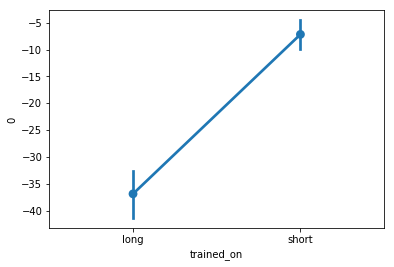

In [243]:
sns.pointplot(x='trained_on', y=0, data=pd.DataFrame(fullres)['DRRD'].stack().reset_index())

In [145]:
p[p.trained_here].groupby(['trained_on','true_label']).prediction.mean().reset_index().groupby('trained_on').apply(lambda df: (df.true_label-df.prediction).mean())

trained_on
long    -21.225577
short   -11.534344
dtype: float64

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


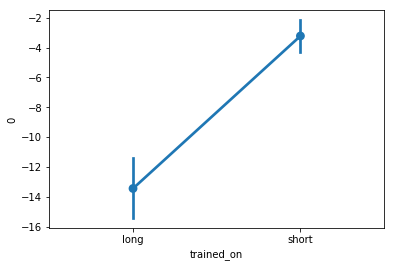

In [136]:
sns.pointplot(x='trained_on', y=0, data=pd.DataFrame(fullres).stack().stack().reset_index())

## Classification

In [ ]:
fullres = {}
for i, (name, (df_short, df_long)) in product(np.arange(200), zip(['DRRD', 'd1','d2'], 
                                                                zip([gb_short, d1_short, d2_short],
                                                                    [gb_long, d1_long, d2_long]))):
    print(i,name)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        clf = LinearDiscriminantAnalysis()
        res = shuffle_cross_predict(clf, [df_short, df_long], ['short','long'], feature_scaling='robust', problem='regression')
        p = res.predictions
        fullres[(name, i)] = p[p.trained_here].groupby(['trained_on','true_label']).prediction.mean().reset_index()\
                                              .groupby('trained_on').apply(lambda df: (df.true_label-df.prediction).mean())


0 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
0 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
3 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
6 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
9 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
12 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
15 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<cla

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


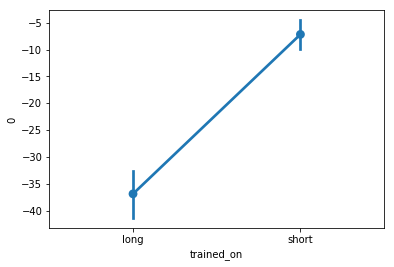

In [243]:
sns.pointplot(x='trained_on', y=0, data=pd.DataFrame(fullres)['DRRD'].stack().reset_index())

In [145]:
p[p.trained_here].groupby(['trained_on','true_label']).prediction.mean().reset_index().groupby('trained_on').apply(lambda df: (df.true_label-df.prediction).mean())

trained_on
long    -21.225577
short   -11.534344
dtype: float64

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


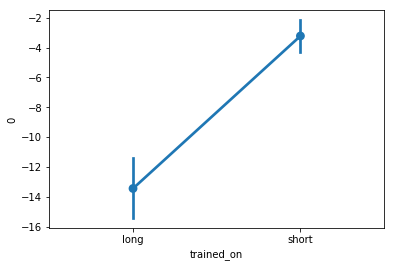

In [136]:
sns.pointplot(x='trained_on', y=0, data=pd.DataFrame(fullres).stack().stack().reset_index())

# Statistics

In [137]:
from scipy.stats import ttest_rel

In [142]:
ttest_rel(pd.DataFrame(fullres).stack().stack()['long'], pd.DataFrame(fullres).stack().stack()['short'])

Ttest_relResult(statistic=-9.014480451065875, pvalue=2.64420896822102e-18)

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


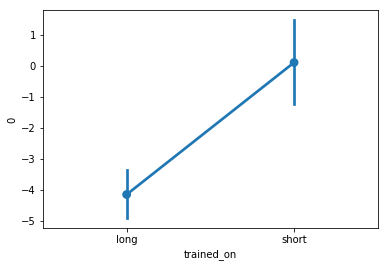

In [127]:
sns.pointplot(x='trained_on', y=0, data=pd.DataFrame(fullres)['d1'].stack().reset_index())

/disk1/home/svo6059/anaconda3/envs/spk/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


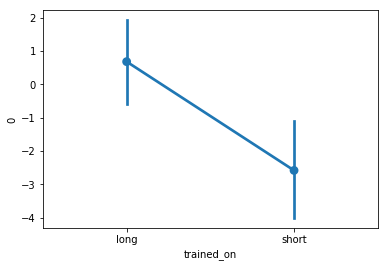

In [128]:
sns.pointplot(x='trained_on', y=0, data=pd.DataFrame(fullres)['d2'].stack().reset_index())

In [91]:
p = res['DRRD'].predictions
p[p.trained_here].groupby(['trained_on','true_label']).prediction.mean().reset_index()\
                 .groupby('trained_on').apply(lambda df: (df.true_label-df.prediction).mean())

trained_on
long    -39.021142
short   -29.006798
dtype: float64

In [51]:
import pandas as pd

In [75]:
b = p[p.trained_here==True].groupby('trained_on')\
                            .apply(lambda df: pd.Series((df.true_label-df.prediction).values, df.true_label.values))\
                            .reset_index()
b.columns = ['trained_on', 'time', 'bias']

In [76]:
b.groupby(['trained_on', 'time']).bias.mean().unstack(0).mean()

trained_on
long    -42.741269
short   -18.231906
dtype: float64

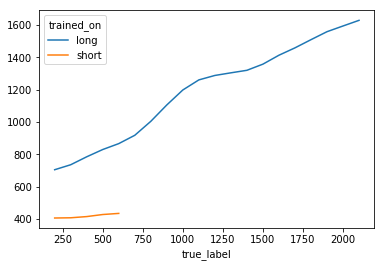

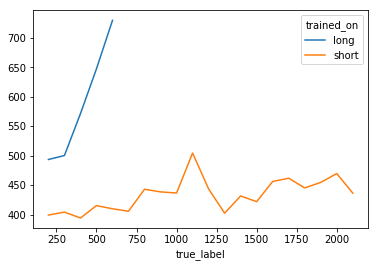

In [77]:
p[p.trained_here].groupby(['trained_on','true_label']).prediction.mean().unstack(0).plot()
p[p.trained_here==False].groupby(['trained_on','true_label']).prediction.mean().unstack(0).plot()

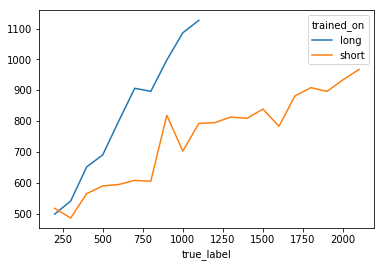

In [32]:
p[p.trained_here==False].groupby(['trained_on','true_label']).prediction.mean().unstack(0).plot()

# With medium size 

In [241]:
dur = gb[3].reset_index().drop_duplicates('trial').duration
print(dur[(dur > 1.) & (dur < 5.)].quantile(.33))
print(dur[(dur > 1.) & (dur < 5.)].quantile(.66))

1.6054033780097963
2.154202656745911


In [ ]:
gb = [io.load(label, 'wide_smoothed') for label in SHORTCUTS['groups']['DRRD']]

gb_short = frankenstein(gb, _min_duration=1., _max_duration=2., is_selected=True, is_tired=False)
gb_medium = frankenstein(gb, _min_duration=2., _max_duration=3., is_selected=True, is_tired=False)
gb_long = frankenstein(gb, _min_duration=2.5, is_selected=True, is_tired=False)

In [ ]:
fullres = {}
for i, (name, (df_short, df_long)) in product(np.arange(200), zip(['DRRD', 'd1','d2'], 
                                                                zip([gb_short, d1_short, d2_short],
                                                                    [gb_long, d1_long, d2_long]))):
    print(i,name)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        clf = BayesianRidge()
        res = shuffle_cross_predict(clf, [df_short, df_long], ['short','long'], feature_scaling='robust', problem='regression')
        p = res.predictions
        fullres[(name, i)] = p[p.trained_here].groupby(['trained_on','true_label']).prediction.mean().reset_index()\
                                              .groupby('trained_on').apply(lambda df: (df.true_label-df.prediction).mean())


0 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
0 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
3 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
6 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 3

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
9 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
12 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<c

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
15 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<cla

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
18 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
18 d2
<c

21 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
21 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<cl

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
24 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
27 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
30 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
33 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pa

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
36 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pa

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
39 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
40 DRRD
<c

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
43 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<clas

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
46 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<cla

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
49 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
52 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 13

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
55 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 

58 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
58 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
61 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130,

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
64 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 3

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
67 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
70 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
73 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<c

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
76 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
79 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
79 d2
<c

82 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
82 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<cl

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
85 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
88 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
91 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'p

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
94 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pa

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
97 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pa

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
100 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'p

103 d2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
104 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
107 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<cl

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1250, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
110 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
113 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 1

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(940, 46)
116 DRRD
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(166

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
119 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
122 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130,

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1670, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
125 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 3

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1660, 135)
128 d1
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(1130, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.indexes.base.Index'>
(860, 36)
<

In [ ]:
gb_short

# Similarity in the activity 

In [159]:
short_avg = gb_short.reset_index().groupby('time').mean().drop('trial', axis=1)
long_avg = gb_long.reset_index().groupby('time').mean().drop('trial', axis=1)

In [199]:
from sklearn.metrics import euclidean_distances, pairwise_distances
from scipy.spatial.distance import mahalanobis
from spikelearn.models.mahalanobis import MahalanobisClassifier

In [200]:
mah = MahalanobisClassifier()

In [204]:
short_avg.reset_index().time.values

array([ 200.,  300.,  400.,  500.,  600.,  700.,  800.,  900., 1000.,
       1100.])

In [207]:
mah.fit(gb_short.values, gb_short.reset_index().time)

In [213]:
mah.precision_[200]

0.0

In [209]:
mah.transform(long_avg.values)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [166]:
dists = euclidean_distances(short_avg, long_avg)

In [171]:
import matplotlib.pyplot as plt

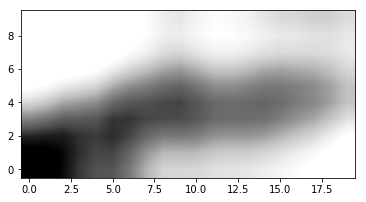

In [194]:
plt.imshow(dists, cmap='Greys_r', interpolation='bilinear', vmin=20, vmax=40, origin='lower')

In [162]:
for s, l in product(short_avg.index.values, long_avg.index.values):
    print(s,l)

200.0 200.0
200.0 300.0
200.0 400.0
200.0 500.0
200.0 600.0
200.0 700.0
200.0 800.0
200.0 900.0
200.0 1000.0
200.0 1100.0
200.0 1200.0
200.0 1300.0
200.0 1400.0
200.0 1500.0
200.0 1600.0
200.0 1700.0
200.0 1800.0
200.0 1900.0
200.0 2000.0
200.0 2100.0
300.0 200.0
300.0 300.0
300.0 400.0
300.0 500.0
300.0 600.0
300.0 700.0
300.0 800.0
300.0 900.0
300.0 1000.0
300.0 1100.0
300.0 1200.0
300.0 1300.0
300.0 1400.0
300.0 1500.0
300.0 1600.0
300.0 1700.0
300.0 1800.0
300.0 1900.0
300.0 2000.0
300.0 2100.0
400.0 200.0
400.0 300.0
400.0 400.0
400.0 500.0
400.0 600.0
400.0 700.0
400.0 800.0
400.0 900.0
400.0 1000.0
400.0 1100.0
400.0 1200.0
400.0 1300.0
400.0 1400.0
400.0 1500.0
400.0 1600.0
400.0 1700.0
400.0 1800.0
400.0 1900.0
400.0 2000.0
400.0 2100.0
500.0 200.0
500.0 300.0
500.0 400.0
500.0 500.0
500.0 600.0
500.0 700.0
500.0 800.0
500.0 900.0
500.0 1000.0
500.0 1100.0
500.0 1200.0
500.0 1300.0
500.0 1400.0
500.0 1500.0
500.0 1600.0
500.0 1700.0
500.0 1800.0
500.0 1900.0
500.0 2000.0
500.0